# PCA

In [1]:
import pandas as pd
import numpy as np
import pickle

#data for standars ML models
data = pickle.load(open('data_img_200_200.pickle',mode='rb'))

In [2]:
data.dropna(how = 'any', inplace = True)

In [3]:
y = data['category']
X = data.drop(columns='category')

In [4]:
from sklearn.decomposition import PCA

#performing PCA to shink the dimension of columns (pixels)
pca = PCA(n_components=None,whiten=True,svd_solver = 'auto')
pca.fit(X)

PCA(whiten=True)

In [5]:
expl_var_df = pd.DataFrame()
expl_var_df['explained_var']=pca.explained_variance_ratio_
expl_var_df['cum_explained_var']=expl_var_df['explained_var'].cumsum()
expl_var_df['principal_com'] = np.arange(1,len(expl_var_df)+1)
expl_var_df.head(10)

,explained_var,cum_explained_var,principal_com
0,0.326377,0.326377,1
1,0.127245,0.453622,2
2,0.087147,0.540769,3
3,0.044251,0.585020,4
4,0.026229,0.611249,5
5,0.023359,0.634607,6
6,0.018181,0.652788,7
7,0.013584,0.666372,8
8,0.012613,0.678985,9
9,0.010761,0.689746,10


In [6]:
expl_var_df.set_index('principal_com',inplace=True)

<AxesSubplot:xlabel='principal_com'>

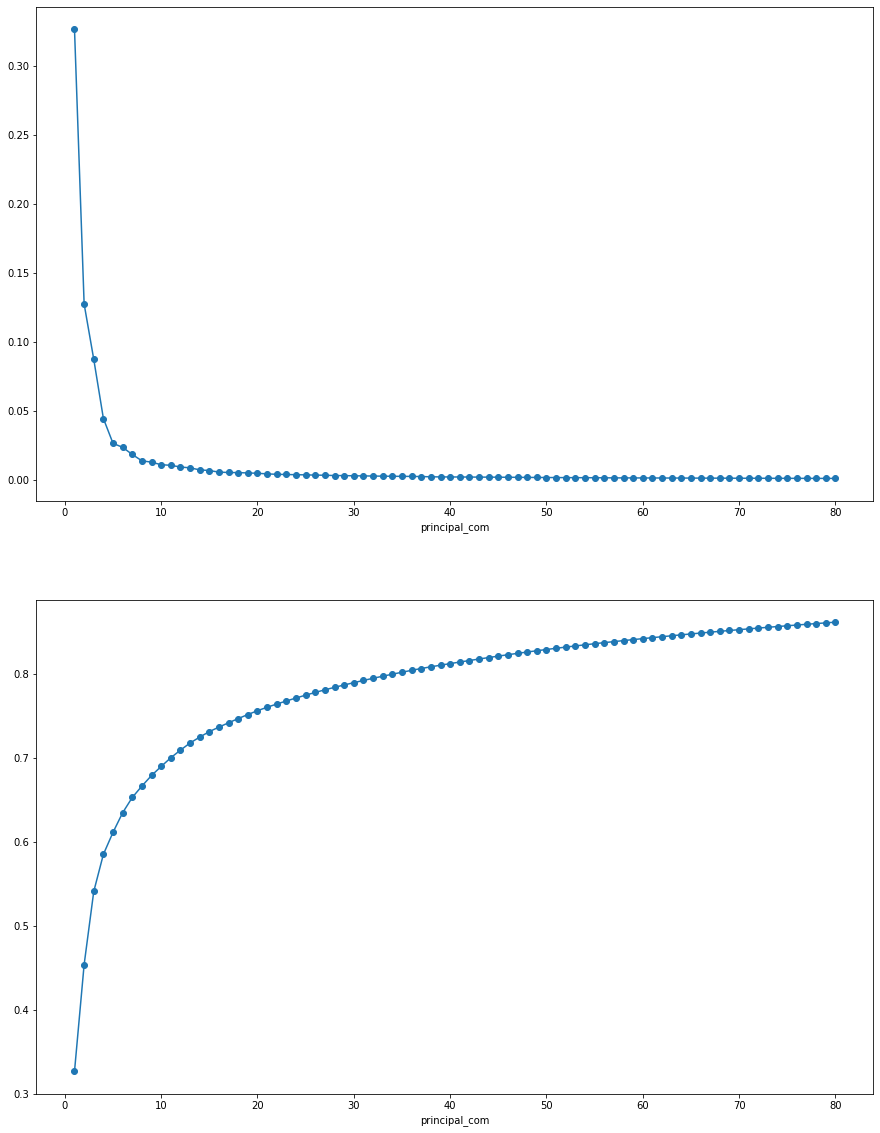

In [8]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows = 2, figsize=(15,20))
expl_var_df['explained_var'].head(80).plot(kind='line',marker = 'o', ax=ax[0])
expl_var_df['cum_explained_var'].head(80).plot(kind='line',marker = 'o', ax=ax[1])

In [9]:
#we have to set the number of components to explain at least 80% of variance so 50 components will be totally enough

from sklearn.decomposition import PCA
pca_70 = PCA(n_components=70,whiten=True,svd_solver = 'auto')
pca_data = pca_70.fit_transform(X)

# Data preparation

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
dict_names = {'klapki-i-sandaly':1, 'polbuty':2, 'sportowe':3, 'kozaki-i-inne':4}

In [15]:
y = y.apply(lambda row: dict_names[row])

In [16]:
X = pca_data #we feed the model with dataset after PCA

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7999, 70) (2000, 70) (7999,) (2000,)


## SVC 

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [18]:
model_svc = SVC(probability=True)

param_grid = {'C':[0.1,0.5,1,10,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001]}

In [19]:
model_grid = GridSearchCV(model_svc, param_grid=param_grid,scoring = 'accuracy', cv =3, verbose = 2)
model_grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  17.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  15.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  15.9s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   6.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   5.8s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   5.6s
[CV] END ......................C=0.1, gamma=0.05, kernel=rbf; total time=  20.1s
[CV] END ......................C=0.1, gamma=0.05, kernel=rbf; total time=  19.0s
[CV] END ......................C=0.1, gamma=0.05, kernel=rbf; total time=  17.6s
[CV] END .....................C=0.1, gamma=0.05, kernel=poly; total time=   6.7s
[CV] END .....................C=0.1, gamma=0.05, kernel=poly; total time=   6.6s
[CV] END .....................C=0.1, gamma=0.05

[CV] END .......................C=50, gamma=0.1, kernel=poly; total time=   5.6s
[CV] END .......................C=50, gamma=0.05, kernel=rbf; total time=  14.7s
[CV] END .......................C=50, gamma=0.05, kernel=rbf; total time=  15.1s
[CV] END .......................C=50, gamma=0.05, kernel=rbf; total time=  15.4s
[CV] END ......................C=50, gamma=0.05, kernel=poly; total time=   5.6s
[CV] END ......................C=50, gamma=0.05, kernel=poly; total time=   5.5s
[CV] END ......................C=50, gamma=0.05, kernel=poly; total time=   6.0s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   6.7s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   6.2s
[CV] END .......................C=50, gamma=0.01, kernel=rbf; total time=   6.0s
[CV] END ......................C=50, gamma=0.01, kernel=poly; total time=   5.3s
[CV] END ......................C=50, gamma=0.01, kernel=poly; total time=   6.1s
[CV] END ...................

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100],
                         'gamma': [0.1, 0.05, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [20]:
model_grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [21]:
model_finale = model_grid.best_estimator_

## Evaluate the model SVC 

In [22]:
y_pred = model_finale.predict(X_test)

In [23]:
cr = metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.93      0.94      0.93       500
           2       0.74      0.73      0.73       500
           3       0.74      0.72      0.73       500
           4       0.94      0.95      0.94       500

    accuracy                           0.84      2000
   macro avg       0.83      0.84      0.84      2000
weighted avg       0.83      0.84      0.84      2000



## Save model

In [24]:
import pickle
pickle.dump(model_finale,open('svm_model.pickle',mode='wb'))

## Bagging classifier 

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf = BaggingClassifier(base_estimator=SVC(C=10.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma=0.01, kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [27]:
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=10.0, gamma=0.01))

In [28]:
y_pred = clf.predict(X_test)
cr = metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.91      0.94      0.93       500
           2       0.72      0.74      0.73       500
           3       0.74      0.70      0.72       500
           4       0.94      0.94      0.94       500

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



## Logistic regression 

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [33]:
model_reg = LogisticRegression()

param_grid = {'C':[0.01,0.5,1,10],

             'penalty':['elasticnet', 'l1', 'l2', None]}

In [34]:
model_grid = GridSearchCV(model_reg, param_grid=param_grid,scoring = 'accuracy', cv =3, verbose = 2)
model_grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ...............................C=0.01, penalty=None; total time=   0.0s
[CV] END ...............................C=0.01, penalty=None; total time=   0.0s
[CV] END ...............................C=0.01, 

C:\Users\annaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\annaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\annaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\annaz\AppData\Local\Programs\Pyth

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.5, 1, 10],
                         'penalty': ['elasticnet', 'l1', 'l2', None]},
             scoring='accuracy', verbose=2)

In [35]:
model_grid.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [36]:
model_finale = model_grid.best_estimator_

In [37]:
y_pred = model_finale.predict(X_test)
cr = metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.88      0.86      0.87       500
           2       0.62      0.63      0.62       500
           3       0.64      0.65      0.64       500
           4       0.93      0.91      0.92       500

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.77      0.76      0.77      2000

